## IMPORTING LIBRARIES

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import cv2

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator #generate labels for the images

from tensorflow.keras import layers, models

In [154]:
img = image.load_img("C:/dataset/train/healthy_leaves/1.jpeg")

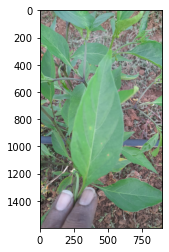

In [155]:
plt.imshow(img)

In [8]:
cv2.imread("C:/dataset/train/healthy_leaves/1.jpeg").shape

(1599, 899, 3)

In [162]:
img = image.load_img("C:/dataset/train/unhealthy_leaves/uh_2.jpeg")

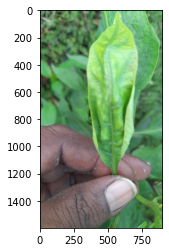

In [163]:
plt.imshow(img)

In [9]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [10]:
train_dataset = train.flow_from_directory("C:/dataset/train/", target_size= (200,200), batch_size = 3,
                                           class_mode ="binary")
 
validation_dataset = validation.flow_from_directory("C:/dataset/validation/", target_size= (200,200), batch_size = 3,
                                           class_mode ="binary")
   

Found 58 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [35]:
train_dataset.class_indices
train_dataset.classes



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### CONVOLUTIONAL NEURAL NETWORK (CNN)

In [20]:
model_1 = tf.keras.models.Sequential([
                              layers.Conv2D(16,(3,3),activation ='relu', input_shape = (200,200,3)),
                              layers.MaxPool2D(2,2),
                                   
                                layers.Conv2D(32,(3,3),activation ='relu'),
                                layers.MaxPool2D(2,2),
                                                          
                                 layers.Conv2D(64,(3,3),activation ='relu'),
                                 layers.MaxPool2D(2,2),
                                    
                                 layers.Flatten(),
                                                        
                                 layers.Dense(512,activation = 'relu'),
                                                           
                                 layers.Dense(1,activation='sigmoid')
                                                          
                                  
                                                           ]
                                                          )

In [24]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)      

In [62]:
model_1.compile(loss = 'binary_crossentropy',
             optimizer =tf.keras.optimizers.Adadelta(),
             metrics = ['accuracy'] )

In [63]:
history = model_1.fit(train_dataset,
                     steps_per_epoch= 3,
                     epochs = 10,
                     validation_data= validation_dataset)

Epoch 1/10
3/3 [==============================] - 3s 890ms/step - loss: 0.2804 - accuracy: 1.0000 - val_loss: 0.5356 - val_accuracy: 0.8000
Epoch 2/10
3/3 [==============================] - 2s 662ms/step - loss: 0.2875 - accuracy: 1.0000 - val_loss: 0.5359 - val_accuracy: 0.8000
Epoch 3/10
3/3 [==============================] - 2s 775ms/step - loss: 0.3847 - accuracy: 0.8889 - val_loss: 0.5358 - val_accuracy: 0.8000
Epoch 4/10
3/3 [==============================] - 2s 837ms/step - loss: 0.4818 - accuracy: 0.6667 - val_loss: 0.5355 - val_accuracy: 0.8000
Epoch 5/10
3/3 [==============================] - 2s 811ms/step - loss: 0.4161 - accuracy: 0.8889 - val_loss: 0.5352 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 2s 646ms/step - loss: 0.4325 - accuracy: 0.8889 - val_loss: 0.5348 - val_accuracy: 0.8000
Epoch 7/10
3/3 [==============================] - 2s 697ms/step - loss: 0.4341 - accuracy: 0.8571 - val_loss: 0.5344 - val_accuracy: 0.8000
Epoch 8/10
3/3 [====

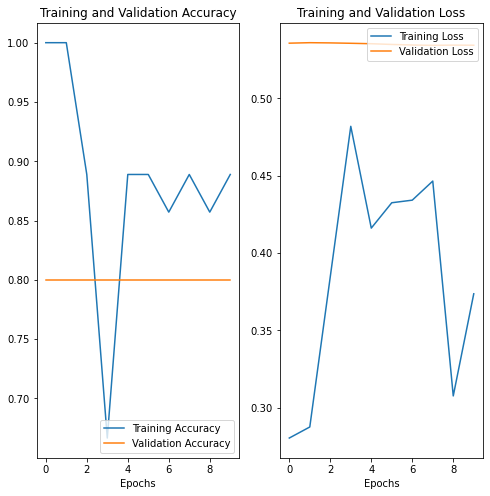

In [64]:
epochs= 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.show()

In [65]:
val_loss, val_acc = model_1.evaluate(validation_dataset, verbose = 2)

4/4 - 0s - loss: 0.5343 - accuracy: 0.8000 - 489ms/epoch - 122ms/step


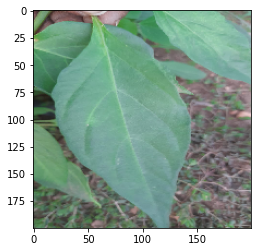

1/1 [==============================] - 0s 100ms/step
The plant is unhealthy


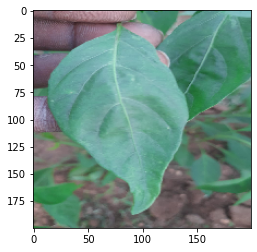

1/1 [==============================] - 0s 34ms/step
The plant is unhealthy


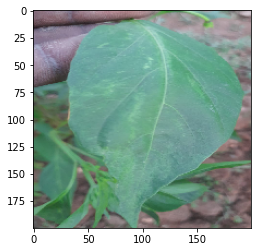

1/1 [==============================] - 0s 34ms/step
The plant is healthy


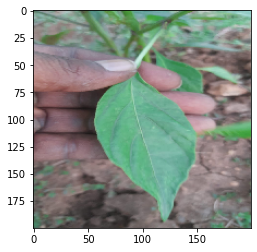

1/1 [==============================] - 0s 49ms/step
The plant is unhealthy


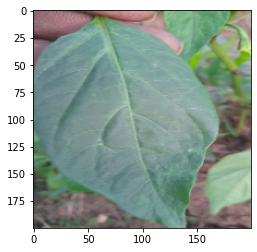

1/1 [==============================] - 0s 37ms/step
The plant is healthy


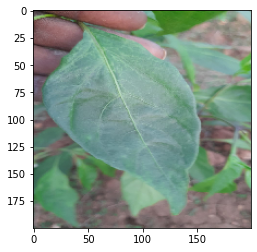

1/1 [==============================] - 0s 58ms/step
The plant is unhealthy


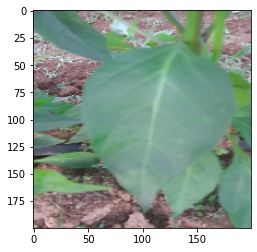

1/1 [==============================] - 0s 50ms/step
The plant is healthy


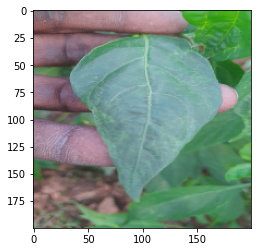

1/1 [==============================] - 0s 36ms/step
The plant is healthy


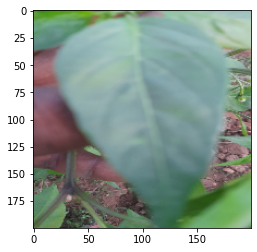

1/1 [==============================] - 0s 42ms/step
The plant is healthy


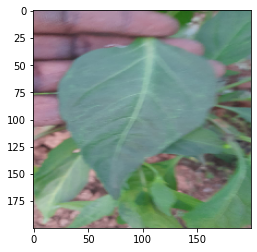

1/1 [==============================] - 0s 33ms/step
The plant is healthy


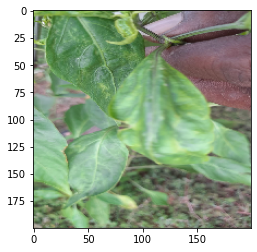

1/1 [==============================] - 0s 38ms/step
The plant is unhealthy


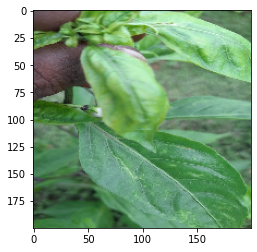

1/1 [==============================] - 0s 33ms/step
The plant is unhealthy


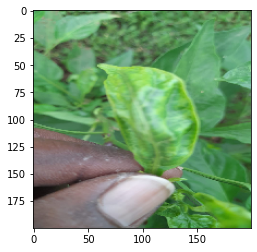

1/1 [==============================] - 0s 35ms/step
The plant is unhealthy


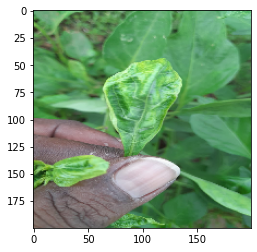

1/1 [==============================] - 0s 33ms/step
The plant is unhealthy


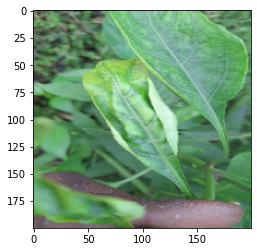

1/1 [==============================] - 0s 32ms/step
The plant is unhealthy


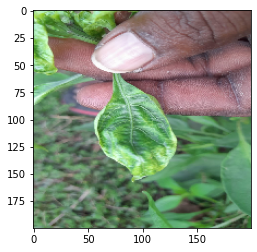

1/1 [==============================] - 0s 46ms/step
The plant is unhealthy


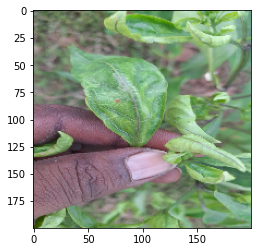

1/1 [==============================] - 0s 48ms/step
The plant is unhealthy


In [56]:
dir_path = 'C:/dataset/test'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
        
    val =  model_1.predict(images)
    if val == 0:
        print("The plant is healthy")
    else:
        print("The plant is unhealthy")
        

### TRANSFER LEARNING

#### ResNet50

In [66]:
import datetime

In [72]:
# Creating a callback function to save model's metrics
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir= dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
     )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [73]:
tl_model = tf.keras.applications.ResNet50V2(include_top=False)
tl_model.trainable = False
inputs = layers.Input(shape=(200, 200, 3), name='input_layer')
x = tl_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2= tf.keras.Model(inputs, outputs)

In [74]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 200, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [75]:
model_2.compile(optimizer='adam',
loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [78]:
epochs=10
history_2 = model_2.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/10
20/20 [==============================] - 8s 393ms/step - loss: 0.0940 - accuracy: 0.9828 - val_loss: 0.0863 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 9s 428ms/step - loss: 0.0743 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 9s 430ms/step - loss: 0.0602 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 8s 430ms/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 8s 421ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 7s 371ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 7s 366ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 1.0000
Epoch 

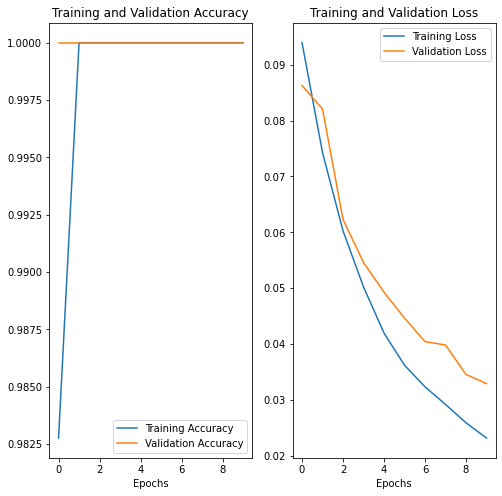

In [87]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.show()

In [89]:
val_loss, val_acc = model_2.evaluate(validation_dataset, verbose = 2)

4/4 - 1s - loss: 0.0329 - accuracy: 1.0000 - 1s/epoch - 359ms/step


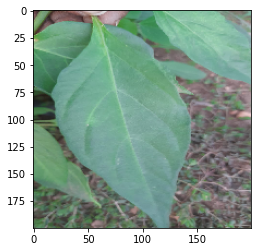

1/1 [==============================] - 1s 1s/step
The plant is unhealthy


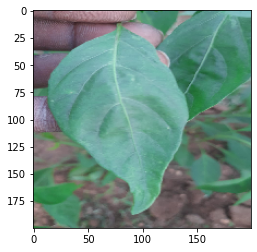

1/1 [==============================] - 0s 109ms/step
The plant is unhealthy


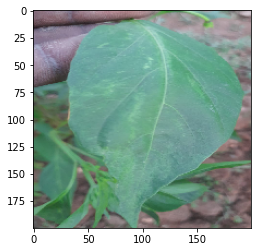

1/1 [==============================] - 0s 151ms/step
The plant is unhealthy


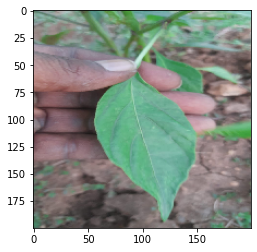

1/1 [==============================] - 0s 156ms/step
The plant is unhealthy


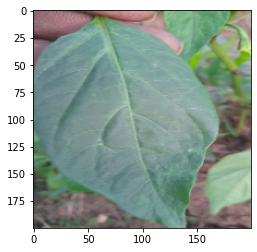

1/1 [==============================] - 0s 112ms/step
The plant is unhealthy


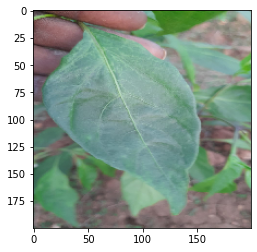

1/1 [==============================] - 0s 153ms/step
The plant is unhealthy


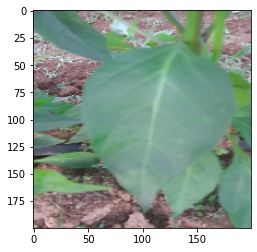

1/1 [==============================] - 0s 130ms/step
The plant is unhealthy


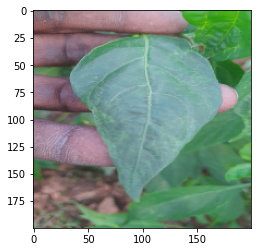

1/1 [==============================] - 0s 106ms/step
The plant is unhealthy


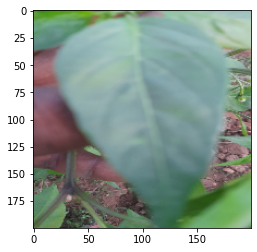

1/1 [==============================] - 0s 104ms/step
The plant is unhealthy


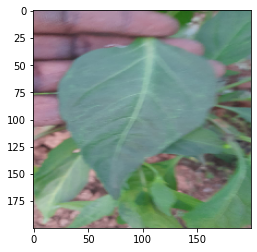

1/1 [==============================] - 0s 115ms/step
The plant is unhealthy


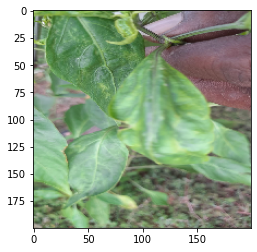

1/1 [==============================] - 0s 108ms/step
The plant is unhealthy


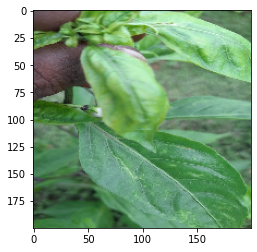

1/1 [==============================] - 0s 107ms/step
The plant is unhealthy


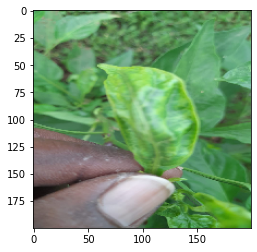

1/1 [==============================] - 0s 154ms/step
The plant is unhealthy


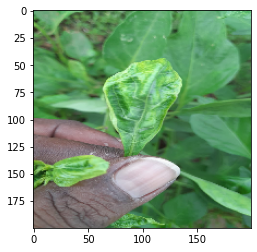

1/1 [==============================] - 0s 104ms/step
The plant is unhealthy


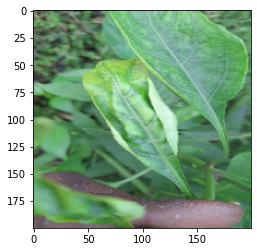

1/1 [==============================] - 0s 117ms/step
The plant is unhealthy


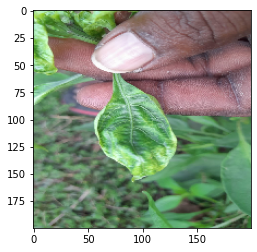

1/1 [==============================] - 0s 141ms/step
The plant is unhealthy


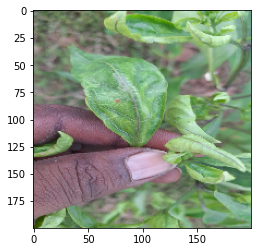

1/1 [==============================] - 0s 120ms/step
The plant is unhealthy


In [84]:
dir_path = 'C:/dataset/test'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
        
    val =  model_2.predict(images)
    if val == 0:
        print("The plant is healthy")
    else:
        print("The plant is unhealthy")

#### VGG16

In [82]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(200,200,3))
base_model.trainable = False ## Not trainable weights

In [83]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(1, activation='sigmoid')


model_3 = models.Sequential([
    
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [85]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [86]:
history_3 = model_3.fit(
  train_dataset,
  validation_data= validation_dataset,
  epochs=epochs
)

Epoch 1/10
20/20 [==============================] - 15s 742ms/step - loss: 0.2875 - accuracy: 0.8448 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 15s 723ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 14s 705ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 14s 722ms/step - loss: 4.3351e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 16s 802ms/step - loss: 2.5602e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 15s 730ms/step - loss: 2.1249e-04 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 15s 720ms/step - loss: 1.8903e-04 - accuracy: 1.0000 - val_loss: 0.0067 - val_

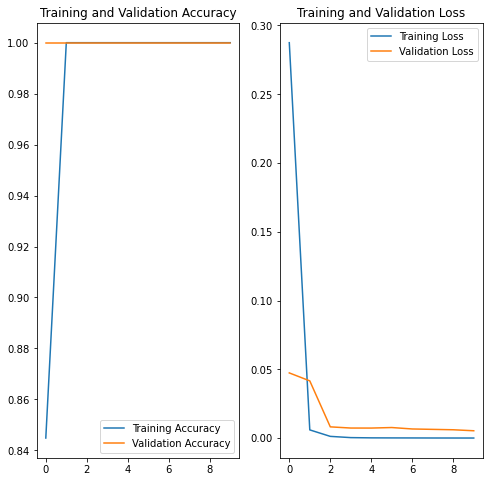

In [90]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [92]:
val_loss, val_acc = model_3.evaluate(validation_dataset, verbose = 2)

4/4 - 2s - loss: 0.0054 - accuracy: 1.0000 - 2s/epoch - 462ms/step


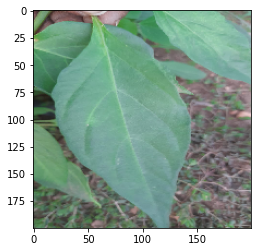

1/1 [==============================] - 1s 632ms/step
The plant is unhealthy


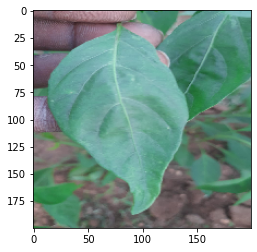

1/1 [==============================] - 0s 267ms/step
The plant is unhealthy


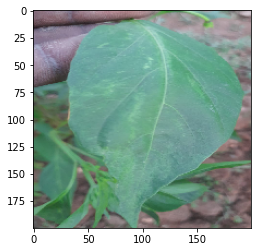

1/1 [==============================] - 0s 207ms/step
The plant is unhealthy


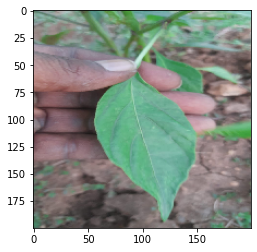

1/1 [==============================] - 0s 194ms/step
The plant is unhealthy


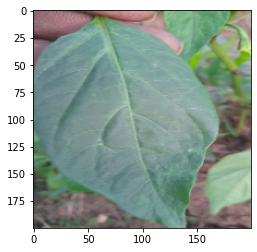

1/1 [==============================] - 0s 194ms/step
The plant is unhealthy


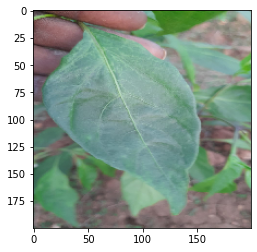

1/1 [==============================] - 0s 206ms/step
The plant is unhealthy


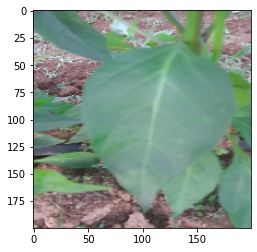

1/1 [==============================] - 0s 201ms/step
The plant is healthy


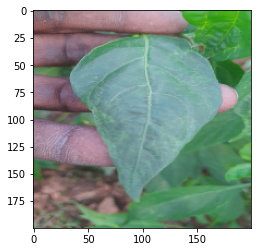

1/1 [==============================] - 0s 190ms/step
The plant is unhealthy


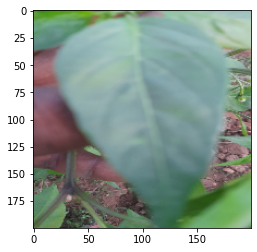

1/1 [==============================] - 0s 195ms/step
The plant is unhealthy


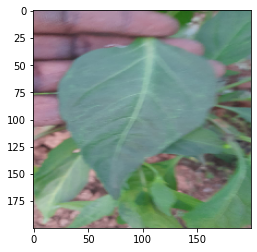

1/1 [==============================] - 0s 194ms/step
The plant is unhealthy


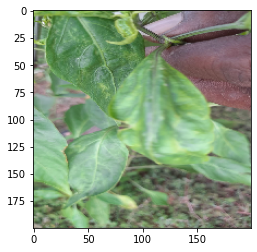

1/1 [==============================] - 0s 194ms/step
The plant is unhealthy


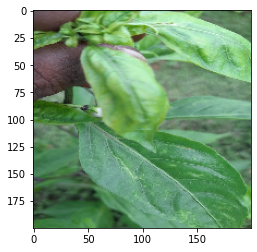

1/1 [==============================] - 0s 224ms/step
The plant is unhealthy


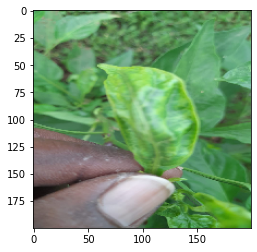

1/1 [==============================] - 0s 252ms/step
The plant is unhealthy


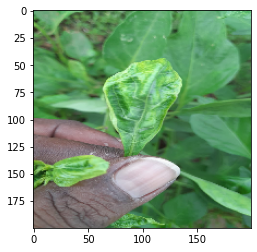

1/1 [==============================] - 0s 231ms/step
The plant is unhealthy


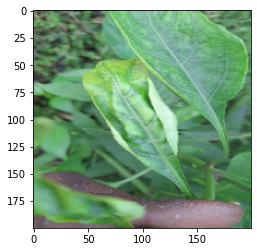

1/1 [==============================] - 0s 240ms/step
The plant is unhealthy


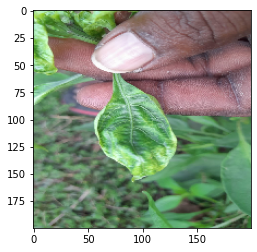

1/1 [==============================] - 0s 305ms/step
The plant is unhealthy


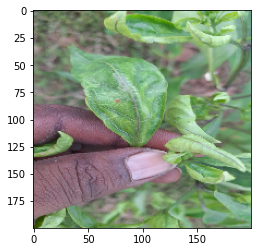

1/1 [==============================] - 0s 261ms/step
The plant is unhealthy


In [99]:
dir_path = 'C:/dataset/test'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
        
    val =  model_3.predict(images)
    if val == 0:
        print("The plant is healthy")
    else:
        print("The plant is unhealthy")

#### AlexNet

In [93]:
model_4 =model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(200,200,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])


In [94]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 23, 23, 256)      1024      
 hNormalization)                                                 
                                                      

In [148]:
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [149]:

history_4 = model_4.fit(
  train_dataset,
  validation_data= validation_dataset,
  epochs=epochs
)

Epoch 1/10
20/20 [==============================] - 24s 977ms/step - loss: 17.3275 - accuracy: 0.8448 - val_loss: 314.0541 - val_accuracy: 0.6000
Epoch 2/10
20/20 [==============================] - 19s 956ms/step - loss: 5.6871 - accuracy: 0.8793 - val_loss: 128.1231 - val_accuracy: 0.8000
Epoch 3/10
20/20 [==============================] - 21s 1s/step - loss: 29.8950 - accuracy: 0.8448 - val_loss: 477.4162 - val_accuracy: 0.6000
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 4.5837 - accuracy: 0.9483 - val_loss: 174.6686 - val_accuracy: 0.5000
Epoch 5/10
20/20 [==============================] - 21s 1s/step - loss: 4.8589 - accuracy: 0.9138 - val_loss: 596.5769 - val_accuracy: 0.6000
Epoch 6/10
20/20 [==============================] - 20s 1s/step - loss: 24.2210 - accuracy: 0.9310 - val_loss: 335.3111 - val_accuracy: 0.4000
Epoch 7/10
20/20 [==============================] - 18s 877ms/step - loss: 2.1142 - accuracy: 0.9828 - val_loss: 87.8882 - val_accuracy: 0.

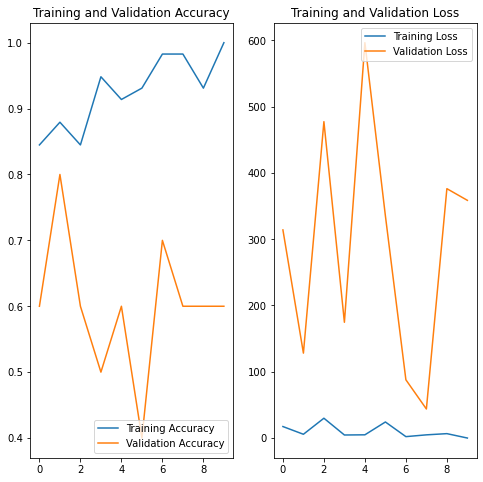

In [151]:
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [152]:
val_loss, val_acc = model_4.evaluate(validation_dataset, verbose = 2)

4/4 - 1s - loss: 358.6772 - accuracy: 0.6000 - 839ms/epoch - 210ms/step


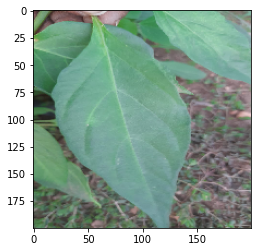

1/1 [==============================] - 0s 158ms/step
The plant is healthy


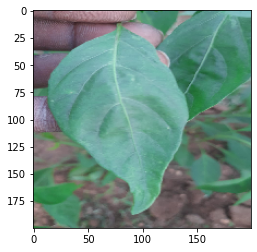

1/1 [==============================] - 0s 49ms/step
The plant is healthy


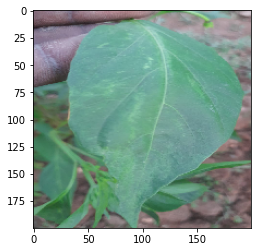

1/1 [==============================] - 0s 54ms/step
The plant is healthy


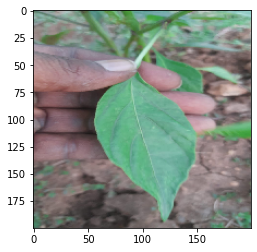

1/1 [==============================] - 0s 52ms/step
The plant is healthy


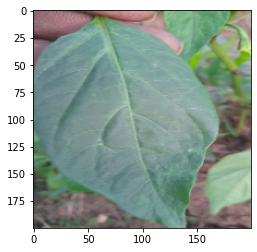

1/1 [==============================] - 0s 46ms/step
The plant is healthy


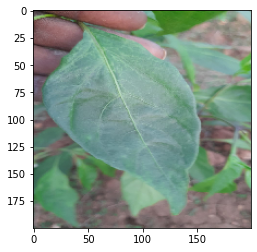

1/1 [==============================] - 0s 56ms/step
The plant is healthy


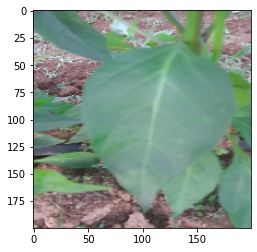

1/1 [==============================] - 0s 47ms/step
The plant is healthy


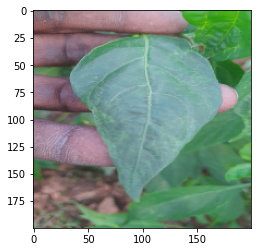

1/1 [==============================] - 0s 44ms/step
The plant is healthy


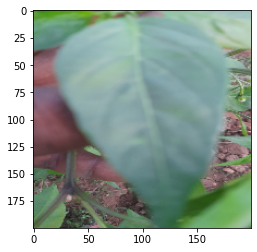

1/1 [==============================] - 0s 49ms/step
The plant is healthy


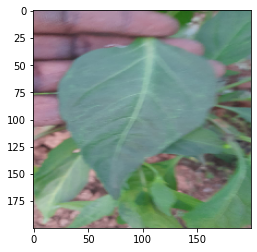

1/1 [==============================] - 0s 47ms/step
The plant is healthy


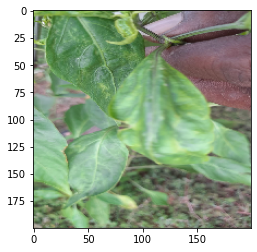

1/1 [==============================] - 0s 44ms/step
The plant is healthy


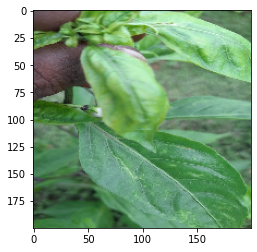

1/1 [==============================] - 0s 53ms/step
The plant is healthy


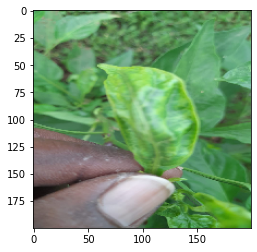

1/1 [==============================] - 0s 50ms/step
The plant is healthy


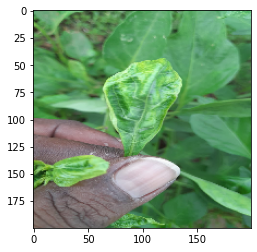

1/1 [==============================] - 0s 42ms/step
The plant is healthy


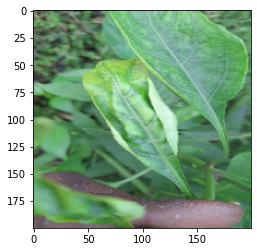

1/1 [==============================] - 0s 56ms/step
The plant is healthy


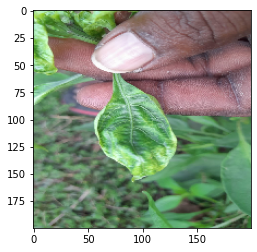

1/1 [==============================] - 0s 48ms/step
The plant is healthy


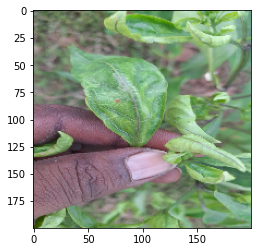

1/1 [==============================] - 0s 71ms/step
The plant is healthy


In [102]:
dir_path = 'C:/dataset/test'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
        
    val =  model_4.predict(images)
    if val == 0:
        print("The plant is healthy")
    else:
        print("The plant is unhealthy")